# **SISTEM REKOMENDASI BUKU**

Notebook ini berisi implementasi sistem rekomendasi buku menggunakan dua pendekatan utama:
1. Content-Based Filtering - berdasarkan kesamaan karakteristik buku
2. Collaborative Filtering - berdasarkan pola rating pengguna

Dataset yang digunakan adalah Goodbooks-10k yang berisi rating buku dari ribuan pengguna.

## 1. Pendahuluan

Sistem rekomendasi buku adalah aplikasi yang menggunakan algoritma machine learning untuk
menyarankan buku kepada pembaca berdasarkan preferensi mereka. Dalam era digital dengan
jutaan buku yang tersedia, sistem rekomendasi menjadi sangat penting untuk membantu
pembaca menemukan buku yang sesuai dengan minat mereka.

Proyek ini mengimplementasikan dua pendekatan utama:
1. Content-based Filtering: Merekomendasikan buku berdasarkan kesamaan fitur buku
   (penulis, tag, deskripsi)
2. Collaborative Filtering: Merekomendasikan buku berdasarkan pola rating dari
   pembaca lain yang memiliki preferensi serupa

Dataset yang digunakan adalah Goodbooks-10k yang berisi informasi tentang 10,000 buku
populer beserta rating dari pengguna.

## 2. Persiapan Lingkungan


### 2.1 Import Library yang Dibutuhkan


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import requests
import os
import re
from datetime import datetime

# Library untuk text processing dan similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Library untuk deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

# Library tambahan
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Mengatur style visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Pada bagian ini, kita mengimpor semua library yang diperlukan untuk proyek sistem rekomendasi:

- **pandas & numpy**: Untuk manipulasi dan analisis data
- **matplotlib & seaborn**: Untuk visualisasi data dan grafik
- **scikit-learn**: Untuk TF-IDF vectorization dan cosine similarity
- **tensorflow**: Untuk implementasi neural collaborative filtering
- **requests**: Untuk mengunduh dataset dari GitHub

Kita juga mengatur random seed dan style visualisasi untuk memastikan reproducibility dan konsistensi tampilan grafik.

### 2.2 Fungsi untuk Mengunduh dan Memuat Dataset

In [ ]:
def download_goodbooks_data():
    """
    Mengunduh dataset Goodbooks-10k dari GitHub
    """
    base_url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/"
    files = {
        'books.csv': 'books.csv',
        'ratings.csv': 'ratings.csv',
        'book_tags.csv': 'book_tags.csv',
        'tags.csv': 'tags.csv',
        'to_read.csv': 'to_read.csv'
    }

    # Membuat direktori data jika belum ada
    if not os.path.exists('goodbooks-10k'):
        os.makedirs('goodbooks-10k')

    print("Mengunduh dataset Goodbooks-10k...")
    for filename, url_path in files.items():
        if not os.path.exists(f'goodbooks-10k/{filename}'):
            print(f"Mengunduh {filename}...")
            try:
                response = requests.get(base_url + url_path)
                with open(f'goodbooks-10k/{filename}', 'wb') as f:
                    f.write(response.content)
                print(f"{filename} berhasil diunduh!")
            except Exception as e:
                print(f"Error mengunduh {filename}: {e}")

    print("Semua file berhasil diunduh!")

def load_goodbooks_data():
    """
    Memuat dataset Goodbooks-10k ke dalam DataFrame
    """
    # Download data jika belum ada
    if not os.path.exists('goodbooks-10k'):
        download_goodbooks_data()

    # Memuat data
    print("Memuat dataset...")
    books = pd.read_csv('goodbooks-10k/books.csv', encoding='utf-8', on_bad_lines='skip')
    ratings = pd.read_csv('goodbooks-10k/ratings.csv')
    book_tags = pd.read_csv('goodbooks-10k/book_tags.csv')
    tags = pd.read_csv('goodbooks-10k/tags.csv')
    to_read = pd.read_csv('goodbooks-10k/to_read.csv')

    print("Dataset berhasil dimuat!")
    return books, ratings, book_tags, tags, to_read

Bagian ini berisi fungsi-fungsi untuk mengunduh dataset Goodbooks-10k dari GitHub repository dan memuatnya ke dalam pandas DataFrame. Dataset terdiri dari 5 file CSV:

- **books.csv**: Informasi detail buku (judul, penulis, rating rata-rata)
- **ratings.csv**: Rating yang diberikan user untuk setiap buku
- **book_tags.csv**: Hubungan antara buku dan tag
- **tags.csv**: Daftar tag yang tersedia
- **to_read.csv**: Daftar buku yang ingin dibaca user

Fungsi ini akan otomatis mengunduh file jika belum ada di local directory.

## 3. Eksplorasi Data

### 3.1 Memuat dan Memeriksa Dataset


In [ ]:
# Memuat semua dataset
books, ratings, book_tags, tags, to_read = load_goodbooks_data()

# Menampilkan informasi dasar tentang setiap dataset
print("=== INFORMASI DATASET ===\n")

print("1. Dataset Books:")
print(f"Jumlah buku: {len(books)}")
print(f"Kolom: {books.columns.tolist()}")
print("\nSample data:")
print(books.head())

print("\n" + "="*50 + "\n")

print("2. Dataset Ratings:")
print(f"Jumlah rating: {len(ratings)}")
print(f"Kolom: {ratings.columns.tolist()}")
print("\nSample data:")
print(ratings.head())

print("\n" + "="*50 + "\n")

print("3. Dataset Book Tags:")
print(f"Jumlah tag assignment: {len(book_tags)}")
print(f"Kolom: {book_tags.columns.tolist()}")
print("\nSample data:")
print(book_tags.head())

print("\n" + "="*50 + "\n")

print("4. Dataset Tags:")
print(f"Jumlah tag unik: {len(tags)}")
print(f"Kolom: {tags.columns.tolist()}")
print("\nSample data:")
print(tags.head())

Mengunduh dataset Goodbooks-10k...
Mengunduh books.csv...
books.csv berhasil diunduh!
Mengunduh ratings.csv...
ratings.csv berhasil diunduh!
Mengunduh book_tags.csv...
book_tags.csv berhasil diunduh!
Mengunduh tags.csv...
tags.csv berhasil diunduh!
Mengunduh to_read.csv...
to_read.csv berhasil diunduh!
Semua file berhasil diunduh!
Memuat dataset...
Dataset berhasil dimuat!
=== INFORMASI DATASET ===

1. Dataset Books:
Jumlah buku: 10000
Kolom: ['book_id', 'goodreads_book_id', 'best_book_id', 'work_id', 'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year', 'original_title', 'title', 'language_code', 'average_rating', 'ratings_count', 'work_ratings_count', 'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url', 'small_image_url']

Sample data:
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2           

Pada tahap ini, kita memuat semua dataset dan melakukan inspeksi awal untuk memahami struktur data:

- Menampilkan jumlah record di setiap dataset
- Melihat kolom-kolom yang tersedia
- Menampilkan sample data dari masing-masing file
- Memahami relasi antar tabel

Informasi ini penting untuk merencanakan strategi preprocessing dan feature engineering.

### 3.2 Analisis Statistik Dataset


In [ ]:
# Statistik deskriptif untuk dataset books
print("=== STATISTIK DATASET BOOKS ===")
print(books.describe())

print("\n=== STATISTIK DATASET RATINGS ===")
print(ratings.describe())

# Informasi tentang missing values
print("\n=== MISSING VALUES ===")
print("Books dataset:")
print(books.isnull().sum())

print("\nRatings dataset:")
print(ratings.isnull().sum())

=== STATISTIK DATASET BOOKS ===
           book_id  goodreads_book_id  best_book_id       work_id  \
count  10000.00000       1.000000e+04  1.000000e+04  1.000000e+04   
mean    5000.50000       5.264697e+06  5.471214e+06  8.646183e+06   
std     2886.89568       7.575462e+06  7.827330e+06  1.175106e+07   
min        1.00000       1.000000e+00  1.000000e+00  8.700000e+01   
25%     2500.75000       4.627575e+04  4.791175e+04  1.008841e+06   
50%     5000.50000       3.949655e+05  4.251235e+05  2.719524e+06   
75%     7500.25000       9.382225e+06  9.636112e+06  1.451775e+07   
max    10000.00000       3.328864e+07  3.553423e+07  5.639960e+07   

        books_count        isbn13  original_publication_year  average_rating  \
count  10000.000000  9.415000e+03                9979.000000    10000.000000   
mean      75.712700  9.755044e+12                1981.987674        4.002191   
std      170.470728  4.428619e+11                 152.576665        0.254427   
min        1.000000  1.951

Bagian ini melakukan analisis statistik deskriptif untuk memahami karakteristik data:

- Distribusi rating (1-5 skala)
- Statistik buku (tahun publikasi, jumlah rating, rating rata-rata)
- Identifikasi missing values dan outliers
- Analisis sparsity data rating

Analisis ini membantu mengidentifikasi potensi masalah data yang perlu ditangani.

### 3.3 Visualisasi Distribusi Data

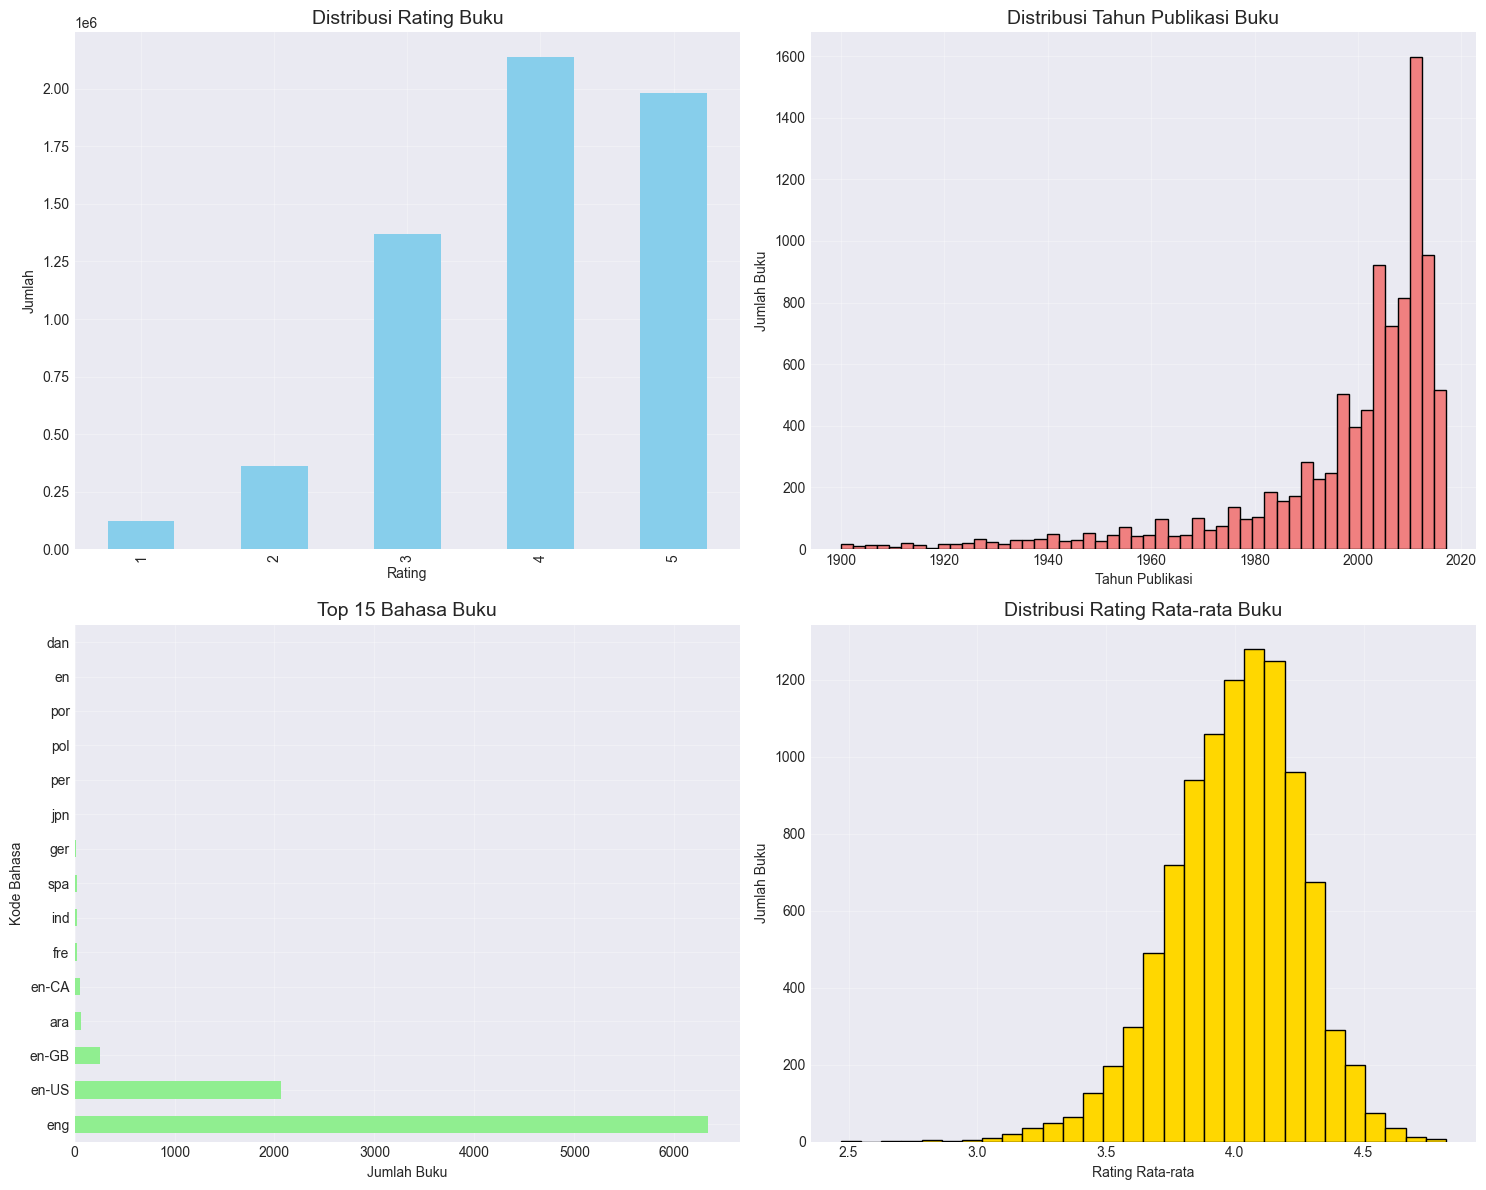

In [ ]:
# Membuat figure dengan subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribusi Rating
ax1 = axes[0, 0]
ratings['rating'].value_counts().sort_index().plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Distribusi Rating Buku', fontsize=14)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Jumlah')
ax1.grid(True, alpha=0.3)

# 2. Distribusi Tahun Publikasi
ax2 = axes[0, 1]
# Filter tahun yang masuk akal (1900-2023)
valid_years = books[(books['original_publication_year'] >= 1900) &
                   (books['original_publication_year'] <= 2023)]
valid_years['original_publication_year'].hist(bins=50, ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Distribusi Tahun Publikasi Buku', fontsize=14)
ax2.set_xlabel('Tahun Publikasi')
ax2.set_ylabel('Jumlah Buku')
ax2.grid(True, alpha=0.3)

# 3. Top 15 Bahasa Buku
ax3 = axes[1, 0]
top_languages = books['language_code'].value_counts().head(15)
top_languages.plot(kind='barh', ax=ax3, color='lightgreen')
ax3.set_title('Top 15 Bahasa Buku', fontsize=14)
ax3.set_xlabel('Jumlah Buku')
ax3.set_ylabel('Kode Bahasa')
ax3.grid(True, alpha=0.3)

# 4. Distribusi Average Rating
ax4 = axes[1, 1]
books['average_rating'].hist(bins=30, ax=ax4, color='gold', edgecolor='black')
ax4.set_title('Distribusi Rating Rata-rata Buku', fontsize=14)
ax4.set_xlabel('Rating Rata-rata')
ax4.set_ylabel('Jumlah Buku')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('book_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

Membuat berbagai visualisasi untuk memahami pola dalam data:

- **Distribusi Rating**: Melihat preferensi rating user (biasanya skewed ke rating tinggi)
- **Distribusi Tahun Publikasi**: Memahami era buku dalam dataset
- **Top Bahasa**: Mengidentifikasi dominasi bahasa tertentu
- **Rating Rata-rata**: Distribusi kualitas buku dalam dataset

Visualisasi ini memberikan insight penting tentang bias dan karakteristik dataset.

### 3.4 Analisis Rating per User dan per Buku

Rata-rata rating per user: 111.87
Median rating per user: 111.00
User dengan rating terbanyak: 200

Rata-rata rating per buku: 597.65
Median rating per buku: 248.00
Buku dengan rating terbanyak: 22806


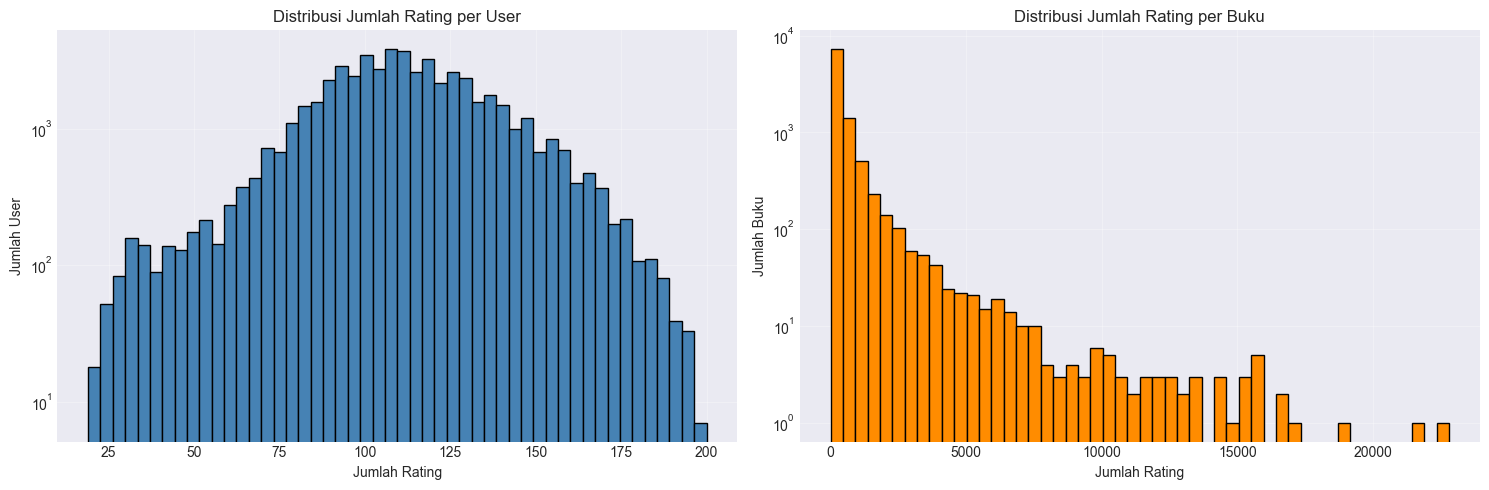

In [ ]:
# Analisis jumlah rating per user
user_rating_counts = ratings.groupby('user_id').size()
print(f"Rata-rata rating per user: {user_rating_counts.mean():.2f}")
print(f"Median rating per user: {user_rating_counts.median():.2f}")
print(f"User dengan rating terbanyak: {user_rating_counts.max()}")

# Analisis jumlah rating per buku
book_rating_counts = ratings.groupby('book_id').size()
print(f"\nRata-rata rating per buku: {book_rating_counts.mean():.2f}")
print(f"Median rating per buku: {book_rating_counts.median():.2f}")
print(f"Buku dengan rating terbanyak: {book_rating_counts.max()}")

# Visualisasi distribusi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Rating per user
user_rating_counts.hist(bins=50, ax=ax1, color='steelblue', edgecolor='black')
ax1.set_title('Distribusi Jumlah Rating per User')
ax1.set_xlabel('Jumlah Rating')
ax1.set_ylabel('Jumlah User')
ax1.set_yscale('log')
ax1.grid(True, alpha=0.3)

# Rating per buku
book_rating_counts.hist(bins=50, ax=ax2, color='darkorange', edgecolor='black')
ax2.set_title('Distribusi Jumlah Rating per Buku')
ax2.set_xlabel('Jumlah Rating')
ax2.set_ylabel('Jumlah Buku')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rating_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

Menganalisis pola interaksi untuk memahami sparsity problem:

- **Rating per User**: Berapa banyak buku yang di-rating setiap user
- **Rating per Buku**: Berapa banyak user yang me-rating setiap buku
- Identifikasi user/buku dengan interaksi minimal
- Visualisasi distribusi dengan log scale

Informasi ini krusial untuk filtering data dan menangani cold start problem.

### 3.5 Analisis Penulis Populer


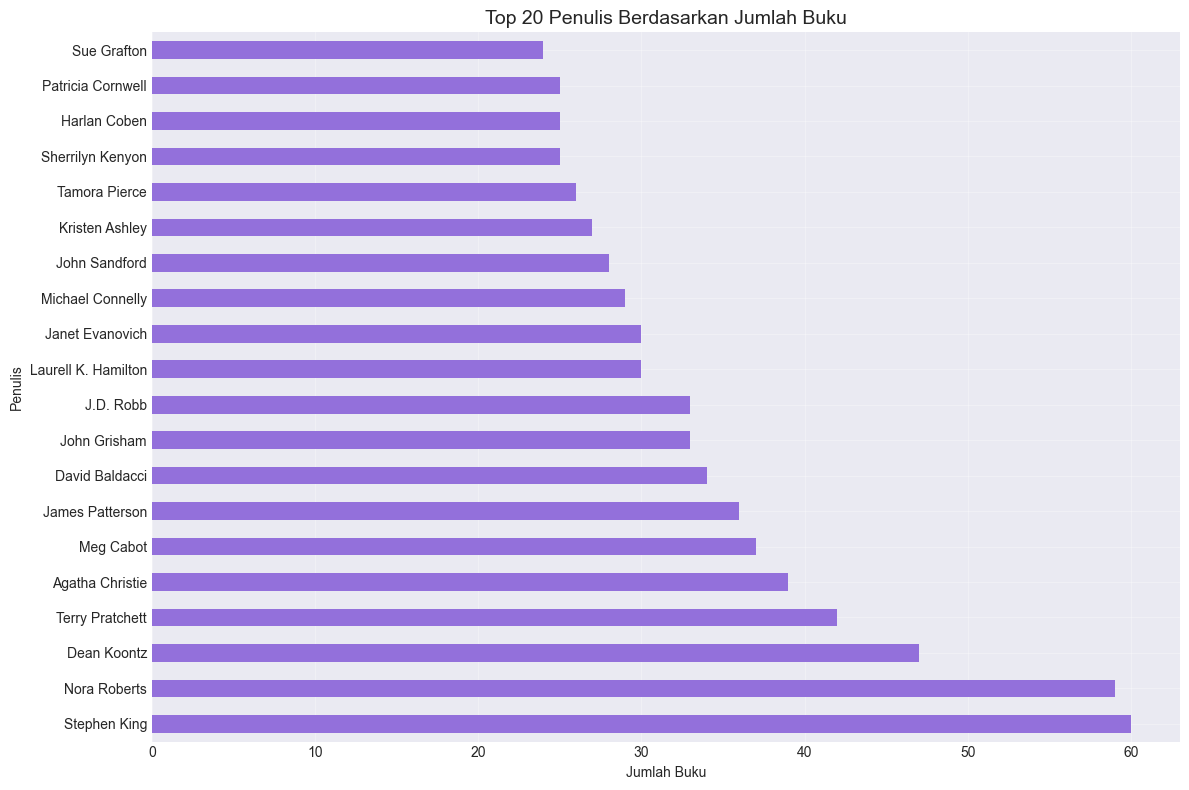

In [ ]:
# Top 20 penulis berdasarkan jumlah buku
top_authors = books['authors'].value_counts().head(20)

plt.figure(figsize=(12, 8))
top_authors.plot(kind='barh', color='mediumpurple')
plt.title('Top 20 Penulis Berdasarkan Jumlah Buku', fontsize=14)
plt.xlabel('Jumlah Buku')
plt.ylabel('Penulis')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('top_authors.png', dpi=300, bbox_inches='tight')
plt.show()

Mengidentifikasi penulis dengan buku terbanyak dalam dataset:

- Top 20 penulis berdasarkan jumlah buku
- Memahami bias author dalam dataset
- Informasi ini berguna untuk content-based filtering

Analisis ini membantu memahami representasi author dalam dataset.

### 3.6 Analisis Tag Populer

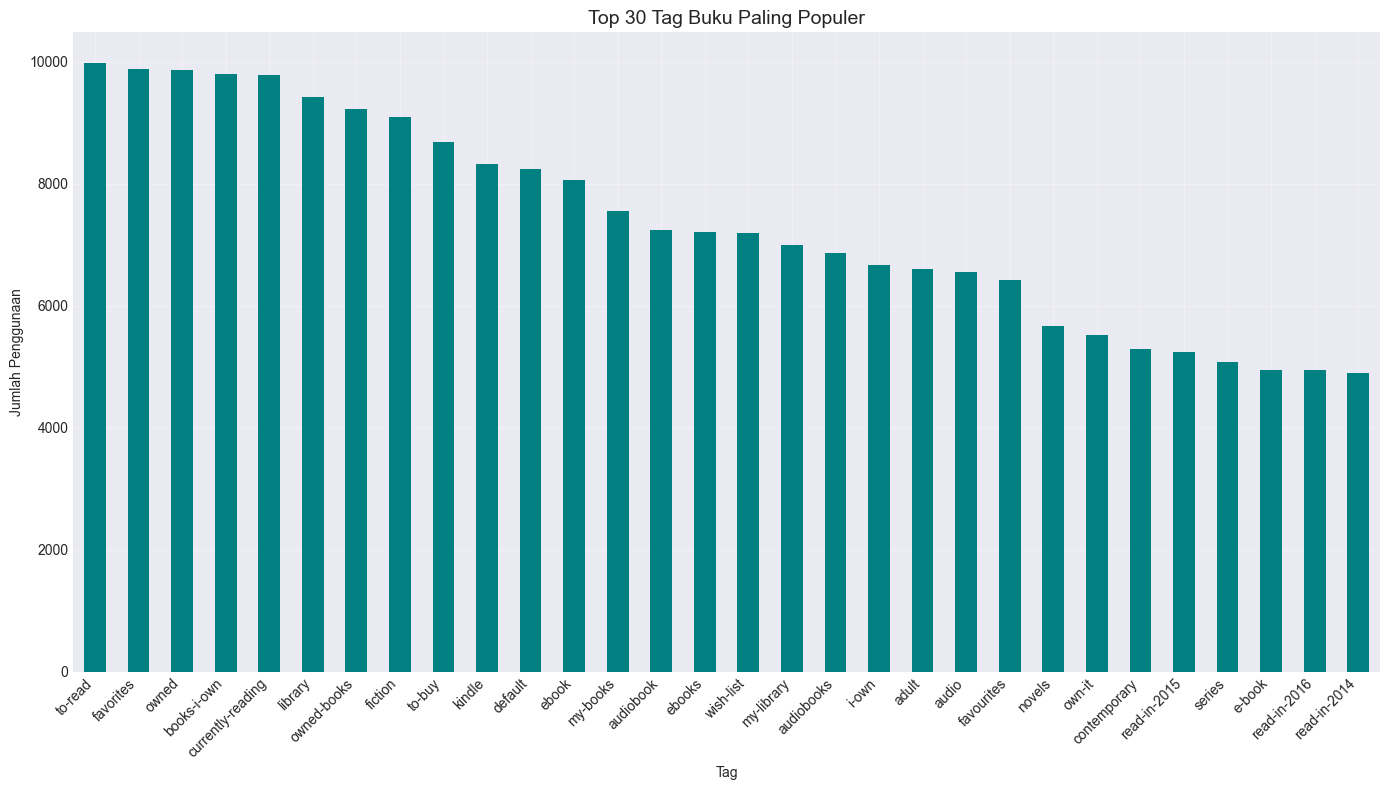

In [ ]:
# Merge book_tags dengan tags untuk mendapatkan nama tag
book_tags_with_names = book_tags.merge(tags, on='tag_id')

# Top 30 tag paling populer
top_tags = book_tags_with_names['tag_name'].value_counts().head(30)

plt.figure(figsize=(14, 8))
top_tags.plot(kind='bar', color='teal')
plt.title('Top 30 Tag Buku Paling Populer', fontsize=14)
plt.xlabel('Tag')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('top_tags.png', dpi=300, bbox_inches='tight')
plt.show()

Menganalisis tag yang paling sering digunakan untuk kategorisasi buku:

- Top 30 tag paling populer (genre, tema, karakteristik)
- Memahami cara user mengkategorikan buku
- Tag akan menjadi fitur penting dalam content-based filtering

Tag memberikan informasi semantik yang kaya tentang konten buku.

## 4. Persiapan Data

### 4.1 Filtering dan Pembersihan Data

In [ ]:
# Menghapus buku dengan sedikit rating (threshold: minimal 10 rating)
min_book_ratings = 10
book_rating_counts = ratings['book_id'].value_counts()
books_to_keep = book_rating_counts[book_rating_counts >= min_book_ratings].index

# Menghapus user dengan sedikit rating (threshold: minimal 10 rating)
min_user_ratings = 10
user_rating_counts = ratings['user_id'].value_counts()
users_to_keep = user_rating_counts[user_rating_counts >= min_user_ratings].index

# Filter ratings
filtered_ratings = ratings[
    (ratings['book_id'].isin(books_to_keep)) &
    (ratings['user_id'].isin(users_to_keep))
]

print(f"Jumlah rating sebelum filtering: {len(ratings)}")
print(f"Jumlah rating setelah filtering: {len(filtered_ratings)}")
print(f"Persentase data yang tersisa: {len(filtered_ratings)/len(ratings)*100:.2f}%")

# Filter books dataset
filtered_books = books[books['book_id'].isin(books_to_keep)].copy()
print(f"\nJumlah buku sebelum filtering: {len(books)}")
print(f"Jumlah buku setelah filtering: {len(filtered_books)}")

Jumlah rating sebelum filtering: 5976479
Jumlah rating setelah filtering: 5976471
Persentase data yang tersisa: 100.00%

Jumlah buku sebelum filtering: 10000
Jumlah buku setelah filtering: 9999


Melakukan filtering untuk mengurangi sparsity dan meningkatkan kualitas data:

- **Minimum Book Ratings**: Hapus buku dengan rating < 10 (terlalu sedikit data)
- **Minimum User Ratings**: Hapus user dengan rating < 10 (tidak aktif)
- Mengurangi noise dan meningkatkan kualitas rekomendasi
- Menampilkan statistik sebelum/sesudah filtering

Filtering ini penting untuk mengurangi sparsity matrix dan meningkatkan performa model.


### 4.2 Feature Engineering untuk Content-Based Filtering

In [ ]:
# Membuat fitur gabungan untuk content-based filtering
def create_book_features(books_df, book_tags_df, tags_df):
    """
    Membuat fitur gabungan dari berbagai atribut buku
    """
    # Gabungkan tags untuk setiap buku
    book_tags_merged = book_tags_df.merge(tags_df, on='tag_id')

    # Aggregate tags per buku
    book_tags_agg = book_tags_merged.groupby('goodreads_book_id')['tag_name'].apply(
        lambda x: ' '.join(x.astype(str))
    ).reset_index()
    book_tags_agg.columns = ['book_id', 'tags']

    # Merge dengan books dataframe
    books_with_features = books_df.merge(book_tags_agg, on='book_id', how='left')

    # Fill missing values
    books_with_features['tags'] = books_with_features['tags'].fillna('')
    books_with_features['authors'] = books_with_features['authors'].fillna('Unknown')

    # Buat fitur gabungan
    books_with_features['combined_features'] = (
        books_with_features['authors'] + ' ' +
        books_with_features['tags']
    )

    return books_with_features

# Membuat fitur untuk content-based filtering
filtered_books_with_features = create_book_features(
    filtered_books,
    book_tags[book_tags['goodreads_book_id'].isin(filtered_books['book_id'])],
    tags
)

print("Sample combined features:")
print(filtered_books_with_features[['title', 'combined_features']].head(3))

Sample combined features:
                                               title  \
0            The Hunger Games (The Hunger Games, #1)   
1  Harry Potter and the Sorcerer's Stone (Harry P...   
2                            Twilight (Twilight, #1)   

                                   combined_features  
0  Suzanne Collins to-read fantasy favorites curr...  
1  J.K. Rowling, Mary GrandPré to-read currently-...  
2  Stephenie Meyer to-read favorites fantasy curr...  


Membuat fitur gabungan untuk content-based filtering:

- Menggabungkan informasi penulis dan tag
- Membuat combined features string untuk setiap buku
- Handle missing values dengan strategi yang tepat
- Preprocessing text untuk TF-IDF

Feature engineering yang baik adalah kunci sukses content-based filtering.


### 4.3 Membuat TF-IDF Matrix untuk Content-Based Filtering

In [ ]:
# Membuat TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,  # Batasi jumlah fitur
    ngram_range=(1, 2),  # Unigram dan bigram
    min_df=2  # Minimal muncul di 2 dokumen
)

# Fit dan transform combined features
tfidf_matrix = tfidf_vectorizer.fit_transform(filtered_books_with_features['combined_features'])

print(f"Ukuran TF-IDF matrix: {tfidf_matrix.shape}")

# Hitung cosine similarity
print("Menghitung cosine similarity...")
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Ukuran similarity matrix: {cosine_sim_matrix.shape}")

# Membuat mapping book_id ke index
book_id_to_index = pd.Series(
    filtered_books_with_features.index,
    index=filtered_books_with_features['book_id']
).to_dict()

index_to_book_id = {v: k for k, v in book_id_to_index.items()}

Ukuran TF-IDF matrix: (9999, 5000)
Menghitung cosine similarity...
Ukuran similarity matrix: (9999, 9999)


Mengkonversi fitur tekstual menjadi representasi numerik:

- **TF-IDF Vectorization**: Mengubah text menjadi vector numerik
- **Parameter tuning**: max_features, ngram_range, min_df
- **Cosine Similarity**: Menghitung kesamaan antar buku
- Membuat mapping book_id ke index untuk efisiensi

Matrix similarity ini adalah inti dari content-based recommendation.

### 4.4 Persiapan Data untuk Collaborative Filtering


In [ ]:
# Split data menjadi train dan test
train_data, test_data = train_test_split(
    filtered_ratings,
    test_size=0.2,
    random_state=42,
    stratify=filtered_ratings['rating']
)

print(f"Jumlah data training: {len(train_data)}")
print(f"Jumlah data testing: {len(test_data)}")

# Membuat mapping user_id dan book_id ke index
unique_users = filtered_ratings['user_id'].unique()
unique_books = filtered_ratings['book_id'].unique()

user_to_index = {user_id: idx for idx, user_id in enumerate(unique_users)}
book_to_index = {book_id: idx for idx, book_id in enumerate(unique_books)}

index_to_user = {idx: user_id for user_id, idx in user_to_index.items()}
index_to_book = {idx: book_id for book_id, idx in book_to_index.items()}

# Convert ke index
train_data_indexed = train_data.copy()
train_data_indexed['user_idx'] = train_data_indexed['user_id'].map(user_to_index)
train_data_indexed['book_idx'] = train_data_indexed['book_id'].map(book_to_index)

test_data_indexed = test_data.copy()
test_data_indexed['user_idx'] = test_data_indexed['user_id'].map(user_to_index)
test_data_indexed['book_idx'] = test_data_indexed['book_id'].map(book_to_index)

print(f"\nJumlah user unik: {len(unique_users)}")
print(f"Jumlah buku unik: {len(unique_books)}")

Jumlah data training: 4781176
Jumlah data testing: 1195295

Jumlah user unik: 53424
Jumlah buku unik: 9999


Mempersiapkan data untuk training model neural network:

- **Train-test split**: 80-20 dengan stratified sampling
- **ID Mapping**: Convert user_id dan book_id ke index numerik
- **Data validation**: Memastikan konsistensi mapping
- Persiapan untuk TensorFlow dataset

Preprocessing yang tepat sangat penting untuk training model yang stabil.

## 5. Pemodelan Content-Based Filtering


### 5.1 Implementasi Fungsi Rekomendasi Content-Based


In [ ]:
def get_content_based_recommendations(book_id, cosine_sim=cosine_sim_matrix,
                                    books_df=filtered_books_with_features,
                                    book_id_to_idx=book_id_to_index,
                                    idx_to_book_id=index_to_book_id,
                                    n_recommendations=10):
    """
    Memberikan rekomendasi buku berdasarkan kesamaan konten

    Parameters:
    -----------
    book_id : int
        ID buku yang menjadi referensi
    cosine_sim : numpy array
        Matrix cosine similarity
    books_df : DataFrame
        DataFrame berisi informasi buku
    book_id_to_idx : dict
        Mapping book_id ke index
    idx_to_book_id : dict
        Mapping index ke book_id
    n_recommendations : int
        Jumlah rekomendasi yang diinginkan

    Returns:
    --------
    DataFrame berisi rekomendasi buku
    """
    # Cek apakah book_id ada dalam dataset
    if book_id not in book_id_to_idx:
        print(f"Book ID {book_id} tidak ditemukan dalam dataset")
        return pd.DataFrame()

    # Dapatkan index buku
    idx = book_id_to_idx[book_id]

    # Dapatkan similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort berdasarkan similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top-n recommendations (skip index 0 karena itu buku yang sama)
    sim_scores = sim_scores[1:n_recommendations+1]

    # Dapatkan book indices
    book_indices = [i[0] for i in sim_scores]

    # Dapatkan book IDs
    recommended_book_ids = [idx_to_book_id[idx] for idx in book_indices]

    # Return dataframe dengan informasi buku
    recommendations = books_df[books_df['book_id'].isin(recommended_book_ids)][
        ['book_id', 'title', 'authors', 'average_rating', 'ratings_count']
    ].copy()

    # Tambahkan similarity score
    recommendations['similarity_score'] = [score[1] for score in sim_scores]

    return recommendations.sort_values('similarity_score', ascending=False)

Membuat fungsi rekomendasi berdasarkan kesamaan konten:

- Input: book_id sebagai referensi
- Proses: Cari buku dengan similarity score tertinggi
- Output: List rekomendasi dengan similarity score
- Handle edge cases (book not found)

Fungsi ini mengimplementasikan algoritma content-based filtering secara efisien.

### 5.2 Demonstrasi Content-Based Filtering


Buku populer untuk demonstrasi:
   book_id                                              title  \
0        1            The Hunger Games (The Hunger Games, #1)   
1        2  Harry Potter and the Sorcerer's Stone (Harry P...   
2        3                            Twilight (Twilight, #1)   
3        4                              To Kill a Mockingbird   
4        5                                   The Great Gatsby   

                       authors  
0              Suzanne Collins  
1  J.K. Rowling, Mary GrandPré  
2              Stephenie Meyer  
3                   Harper Lee  
4          F. Scott Fitzgerald  

=== Rekomendasi untuk: The Hunger Games (The Hunger Games, #1) ===
      book_id                                              title  \
1           2  Harry Potter and the Sorcerer's Stone (Harry P...   
2           3                            Twilight (Twilight, #1)   
4           5                                   The Great Gatsby   
5           6                          

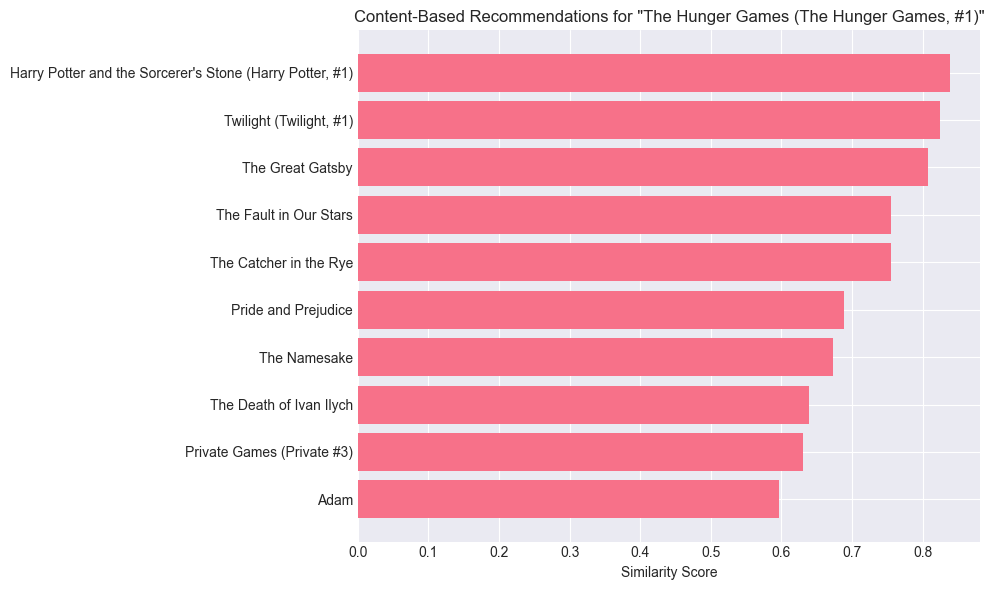

In [ ]:
# Pilih beberapa buku populer sebagai contoh
popular_books = filtered_books_with_features.nlargest(5, 'ratings_count')[
    ['book_id', 'title', 'authors']
]
print("Buku populer untuk demonstrasi:")
print(popular_books)

# Demonstrasi rekomendasi untuk "Harry Potter and the Sorcerer's Stone"
hp_book_id = popular_books.iloc[0]['book_id']
print(f"\n=== Rekomendasi untuk: {popular_books.iloc[0]['title']} ===")

content_recommendations = get_content_based_recommendations(hp_book_id)
print(content_recommendations)

# Visualisasi similarity scores
plt.figure(figsize=(10, 6))
plt.barh(content_recommendations['title'], content_recommendations['similarity_score'])
plt.xlabel('Similarity Score')
plt.title(f'Content-Based Recommendations for "{popular_books.iloc[0]["title"]}"')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('content_based_recommendations.png', dpi=300, bbox_inches='tight')
plt.show()


Menguji sistem content-based dengan buku populer:

- Pilih buku populer sebagai query
- Tampilkan rekomendasi dengan similarity scores
- Visualisasi hasil rekomendasi
- Analisis relevansi rekomendasi

Demonstrasi ini memvalidasi bahwa sistem memberikan rekomendasi yang masuk akal

## 6. Pemodelan Collaborative Filtering


### 6.1 Implementasi Model Neural Collaborative Filtering


In [ ]:
def create_ncf_model(n_users, n_books, embedding_dim=50,
                     hidden_layers=[64, 32, 16],
                     dropout_rate=0.2,
                     l2_reg=1e-6):
    """
    Membuat model Neural Collaborative Filtering

    Parameters:
    -----------
    n_users : int
        Jumlah user unik
    n_books : int
        Jumlah buku unik
    embedding_dim : int
        Dimensi embedding vector
    hidden_layers : list
        List berisi jumlah neuron untuk setiap hidden layer
    dropout_rate : float
        Dropout rate
    l2_reg : float
        L2 regularization factor

    Returns:
    --------
    Keras model
    """
    # Input layers
    user_input = keras.Input(shape=(1,), name='user_input')
    book_input = keras.Input(shape=(1,), name='book_input')

    # Embedding layers dengan regularization
    user_embedding = layers.Embedding(
        n_users,
        embedding_dim,
        embeddings_regularizer=l2(l2_reg),
        name='user_embedding'
    )(user_input)

    book_embedding = layers.Embedding(
        n_books,
        embedding_dim,
        embeddings_regularizer=l2(l2_reg),
        name='book_embedding'
    )(book_input)

    # Flatten embeddings
    user_vec = layers.Flatten()(user_embedding)
    book_vec = layers.Flatten()(book_embedding)

    # Concatenate features
    concat = layers.Concatenate()([user_vec, book_vec])

    # Deep layers
    deep = concat
    for units in hidden_layers:
        deep = layers.Dense(
            units,
            activation='relu',
            kernel_regularizer=l2(l2_reg)
        )(deep)
        deep = layers.BatchNormalization()(deep)
        deep = layers.Dropout(dropout_rate)(deep)

    # Output layer
    output = layers.Dense(1, activation='linear', name='output')(deep)

    # Create model
    model = keras.Model(
        inputs=[user_input, book_input],
        outputs=output,
        name='NCF_Model'
    )

    return model

# Buat model
n_users = len(unique_users)
n_books = len(unique_books)

ncf_model = create_ncf_model(
    n_users=n_users,
    n_books=n_books,
    embedding_dim=50,
    hidden_layers=[128, 64, 32],
    dropout_rate=0.3
)

# Compile model
ncf_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Print model summary
ncf_model.summary()

Model: "NCF_Model"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ book_input          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 50)     │  2,671,200 │ user_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ book_embedding      │ (None, 1, 50)     │    499,950 │ book_input[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 50)        │          0 │ user_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 50)        │          0 │ book_embedding[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100)       │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     12,928 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │      2,080 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dense_2[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,195,343 (12.19 MB)

 Trainable params: 3,194,895 (12.19 MB)

 Non-trainable params: 448 (1.75 KB)

Membangun model deep learning untuk collaborative filtering:

- **Embedding Layers**: Representasi user dan book dalam vector space
- **Deep Neural Network**: Hidden layers dengan regularization
- **Architecture**: Input → Embedding → Concatenate → Dense → Output
- **Regularization**: Dropout, L2 regularization, Batch Normalization

Model NCF dapat menangkap pola non-linear dalam preferensi user.

### 6.2 Persiapan Data untuk Training


In [ ]:
def create_tf_dataset(data, batch_size=256, shuffle=True):
    """
    Membuat TensorFlow dataset dari pandas DataFrame
    """
    # Extract features dan labels
    users = data['user_idx'].values
    books = data['book_idx'].values
    ratings = data['rating'].values

    # Buat dataset
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'user_input': users,
            'book_input': books
        },
        ratings
    ))

    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(data))

    dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return dataset

# Buat dataset untuk training dan validation
train_dataset = create_tf_dataset(train_data_indexed, batch_size=256, shuffle=True)
val_dataset = create_tf_dataset(test_data_indexed, batch_size=256, shuffle=False)

Mengkonversi pandas DataFrame ke TensorFlow Dataset:

- **Efficient batching**: Untuk training yang optimal
- **Data pipeline**: Shuffle, batch, prefetch
- **Memory optimization**: Menghindari memory overflow
- **Input format**: Dictionary dengan user_input dan book_input

Pipeline data yang efisien mempercepat training dan mengurangi memory usage.

### 6.3 Training Model

In [ ]:
# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

model_checkpoint = keras.callbacks.ModelCheckpoint(
    'best_ncf_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Training
print("Memulai training model...")
history = ncf_model.fit(
    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr, model_checkpoint],
    verbose=1
)

Memulai training model...
Epoch 1/30
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.8782 - mae: 0.9959
Epoch 1: val_loss improved from inf to 0.75377, saving model to best_ncf_model.keras
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 853s 45ms/step - loss: 1.8782 - mae: 0.9959 - val_loss: 0.7538 - val_mae: 0.6744 - learning_rate: 0.0010
Epoch 2/30
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7491 - mae: 0.6716
Epoch 2: val_loss improved from 0.75377 to 0.73098, saving model to best_ncf_model.keras
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 831s 44ms/step - loss: 0.7491 - mae: 0.6716 - val_loss: 0.7310 - val_mae: 0.6585 - learning_rate: 0.0010
Epoch 3/30
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7176 - mae: 0.6489
Epoch 3: val_loss improved from 0.73098 to 0.71845, saving model to best_ncf_model.keras
18677/18677 ━━━━━━━━━━━━━━━━━━━━ 819s 43ms/step - loss: 0.7176 - mae: 0.6489 - val_loss: 0.7185 - val_mae: 0.6494 - learning_rate: 0.0010
Epoch 4/30
18677/18677 ━━━━━━━━━━━━━━━━

Melatih model dengan best practices:

- **Callbacks**: Early stopping, learning rate reduction, model checkpoint
- **Monitoring**: Validation loss dan MAE
- **Optimization**: Adam optimizer dengan learning rate scheduling
- **Overfitting prevention**: Multiple regularization techniques

Training yang proper menghasilkan model yang generalize dengan baik.

### 6.4 Visualisasi Hasil Training

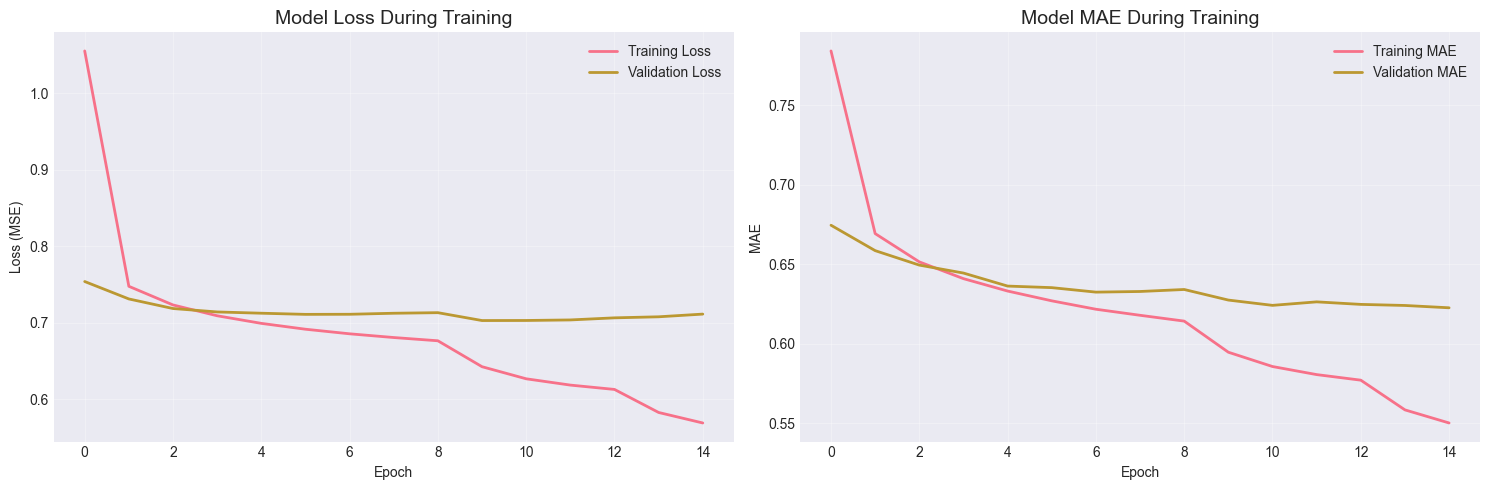

In [ ]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Loss
ax1.plot(history.history['loss'], label='Training Loss', linewidth=2)
ax1.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
ax1.set_title('Model Loss During Training', fontsize=14)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (MSE)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# MAE
ax2.plot(history.history['mae'], label='Training MAE', linewidth=2)
ax2.plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
ax2.set_title('Model MAE During Training', fontsize=14)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('MAE')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
plt.show()

Memantau proses training melalui visualisasi:

- **Loss curves**: Training vs validation loss
- **Metrics tracking**: MAE progression
- **Overfitting detection**: Gap antara training dan validation
- **Training insights**: Kapan model converge

Visualisasi membantu memahami behavior model selama training.

### 6.5 Implementasi Fungsi Rekomendasi Collaborative Filtering

In [ ]:
def get_collaborative_recommendations(user_id, model, books_df, ratings_df,
                                    user_to_idx, book_to_idx,
                                    n_recommendations=10):
    """
    Memberikan rekomendasi buku menggunakan collaborative filtering

    Parameters:
    -----------
    user_id : int
        ID user
    model : keras model
        Trained NCF model
    books_df : DataFrame
        DataFrame berisi informasi buku
    ratings_df : DataFrame
        DataFrame berisi rating
    user_to_idx : dict
        Mapping user_id ke index
    book_to_idx : dict
        Mapping book_id ke index
    n_recommendations : int
        Jumlah rekomendasi

    Returns:
    --------
    DataFrame berisi rekomendasi buku
    """
    # Cek apakah user ada dalam dataset
    if user_id not in user_to_idx:
        print(f"User ID {user_id} tidak ditemukan dalam dataset")
        # Return buku populer sebagai fallback
        popular_books = books_df.nlargest(n_recommendations, 'ratings_count')
        return popular_books[['book_id', 'title', 'authors', 'average_rating']]

    # Dapatkan buku yang sudah dibaca user
    user_books = ratings_df[ratings_df['user_id'] == user_id]['book_id'].values

    # Dapatkan buku yang belum dibaca
    all_books = books_df['book_id'].values
    unread_books = [book for book in all_books if book not in user_books]

    # Batasi jumlah buku untuk prediksi (untuk efisiensi)
    if len(unread_books) > 1000:
        unread_books = np.random.choice(unread_books, 1000, replace=False)

    # Siapkan data untuk prediksi
    user_idx = user_to_idx[user_id]
    user_array = np.array([user_idx] * len(unread_books))
    book_array = np.array([book_to_idx[book_id] for book_id in unread_books])

    # Prediksi rating
    predictions = model.predict(
        {
            'user_input': user_array,
            'book_input': book_array
        },
        verbose=0
    )

    # Buat dataframe hasil prediksi
    pred_df = pd.DataFrame({
        'book_id': unread_books,
        'predicted_rating': predictions.flatten()
    })

    # Sort berdasarkan predicted rating
    pred_df = pred_df.nlargest(n_recommendations, 'predicted_rating')

    # Merge dengan informasi buku
    recommendations = pred_df.merge(
        books_df[['book_id', 'title', 'authors', 'average_rating', 'ratings_count']],
        on='book_id'
    )

    return recommendations

Membuat fungsi rekomendasi menggunakan trained model:

- **Input**: user_id untuk rekomendasi
- **Process**: Prediksi rating untuk buku yang belum dibaca
- **Output**: Top-N buku dengan predicted rating tertinggi
- **Fallback**: Buku populer untuk new users

Fungsi ini mengimplementasikan collaborative filtering dengan model neural network.

### 6.6 Demonstrasi Collaborative Filtering

In [ ]:
# Pilih user sample untuk demonstrasi
sample_users = filtered_ratings['user_id'].value_counts().head(5).index

for user_id in sample_users[:2]:  # Demonstrasi untuk 2 user
    print(f"\n{'='*60}")
    print(f"Rekomendasi untuk User ID: {user_id}")
    print(f"{'='*60}")

    # Tampilkan buku yang sudah dibaca user
    user_books = filtered_ratings[filtered_ratings['user_id'] == user_id]
    user_books_info = user_books.merge(
        filtered_books[['book_id', 'title', 'authors']],
        on='book_id'
    )

    print("\nBuku dengan rating tertinggi dari user:")
    print(user_books_info.nlargest(5, 'rating')[['title', 'authors', 'rating']])

    # Dapatkan rekomendasi
    collab_recommendations = get_collaborative_recommendations(
        user_id,
        ncf_model,
        filtered_books,
        filtered_ratings,
        user_to_index,
        book_to_index
    )

    print("\nRekomendasi Collaborative Filtering:")
    print(collab_recommendations[['title', 'authors', 'predicted_rating']])


Rekomendasi untuk User ID: 30944

Buku dengan rating tertinggi dari user:
                                                title  \
4                               To Kill a Mockingbird   
5   Harry Potter and the Chamber of Secrets (Harry...   
6   The Hitchhiker's Guide to the Galaxy (Hitchhik...   
9                Catching Fire (The Hunger Games, #2)   
12                                  Lord of the Flies   

                        authors  rating  
4                    Harper Lee       5  
5   J.K. Rowling, Mary GrandPré       5  
6                 Douglas Adams       5  
9               Suzanne Collins       5  
12              William Golding       5  

Rekomendasi Collaborative Filtering:
                                               title  \
0      Just Mercy: A Story of Justice and Redemption   
1  Homicidal Psycho Jungle Cat: A Calvin and Hobb...   
2  Attack of the Deranged Mutant Killer Monster S...   
3                           Mark of the Lion Trilogy   
4           

Menguji sistem collaborative filtering dengan sample users:

- Tampilkan preferensi user (buku dengan rating tinggi)
- Generate rekomendasi personal
- Analisis relevansi dengan preferensi user
- Perbandingan dengan content-based results

Demonstrasi memvalidasi bahwa model dapat memberikan rekomendasi personal yang relevan.

## 7. Evaluasi

### 7.1 Evaluasi Content-Based Filtering

In [ ]:
def evaluate_content_based(test_data, books_df, cosine_sim,
                          book_id_to_idx, idx_to_book_id,
                          k=10, rating_threshold=4):
    """
    Evaluasi Content-Based Filtering menggunakan Precision@K

    Parameters:
    -----------
    test_data : DataFrame
        Data testing
    books_df : DataFrame
        DataFrame buku
    cosine_sim : numpy array
        Cosine similarity matrix
    book_id_to_idx : dict
        Mapping book_id ke index
    idx_to_book_id : dict
        Mapping index ke book_id
    k : int
        Jumlah rekomendasi untuk evaluasi
    rating_threshold : float
        Threshold rating untuk menentukan buku yang disukai

    Returns:
    --------
    dict berisi metrik evaluasi
    """
    precision_scores = []
    recall_scores = []

    # Group by user
    user_groups = test_data.groupby('user_id')

    # Sample users untuk evaluasi (untuk efisiensi)
    # Convert dict_keys to list
    all_users = list(user_groups.groups.keys())
    sample_users = np.random.choice(
        all_users,
        min(100, len(all_users)),
        replace=False
    )

    for user_id in sample_users:
        user_data = user_groups.get_group(user_id)

        # Buku yang disukai user (rating >= threshold)
        liked_books = user_data[user_data['rating'] >= rating_threshold]['book_id'].values

        if len(liked_books) < 2:
            continue

        # Pilih satu buku sebagai query
        query_book = np.random.choice(liked_books)
        other_liked_books = [book for book in liked_books if book != query_book]

        # Skip jika query book tidak ada dalam dataset
        if query_book not in book_id_to_idx:
            continue

        # Dapatkan rekomendasi
        recommendations = get_content_based_recommendations(
            query_book,
            cosine_sim,
            books_df,
            book_id_to_idx,
            idx_to_book_id,
            n_recommendations=k
        )

        if len(recommendations) == 0:
            continue

        recommended_books = recommendations['book_id'].values

        # Hitung precision dan recall
        relevant_recommended = len(set(recommended_books) & set(other_liked_books))

        precision = relevant_recommended / k if k > 0 else 0
        recall = relevant_recommended / len(other_liked_books) if len(other_liked_books) > 0 else 0

        precision_scores.append(precision)
        recall_scores.append(recall)

    # Hitung rata-rata
    avg_precision = np.mean(precision_scores) if precision_scores else 0
    avg_recall = np.mean(recall_scores) if recall_scores else 0

    # F1 score
    f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall) \
               if (avg_precision + avg_recall) > 0 else 0

    return {
        'precision@k': avg_precision,
        'recall@k': avg_recall,
        'f1_score': f1_score,
        'n_evaluated_users': len(precision_scores)
    }

# Evaluasi Content-Based Filtering
print("Evaluating Content-Based Filtering...")
cb_metrics = evaluate_content_based(
    test_data_indexed,
    filtered_books_with_features,
    cosine_sim_matrix,
    book_id_to_index,
    index_to_book_id,
    k=10
)

print("\nContent-Based Filtering Metrics:")
for metric, value in cb_metrics.items():
    if metric == 'n_evaluated_users':
        print(f"{metric}: {value}")
    else:
        print(f"{metric}: {value:.4f}")

Evaluating Content-Based Filtering...

Content-Based Filtering Metrics:
precision@k: 0.0242
recall@k: 0.0197
f1_score: 0.0217
n_evaluated_users: 99


Mengukur performa content-based filtering:

- **Precision@K**: Proporsi rekomendasi yang relevan
- **Recall@K**: Proporsi item relevan yang direkomendasikan
- **F1-Score**: Harmonic mean dari precision dan recall
- **Methodology**: Using liked books sebagai ground truth

Evaluasi ini mengukur seberapa baik sistem merekomendasikan buku yang relevan.

### 7.2 Evaluasi Collaborative Filtering


Collaborative Filtering Metrics:
RMSE: 0.8152
MAE: 0.6274


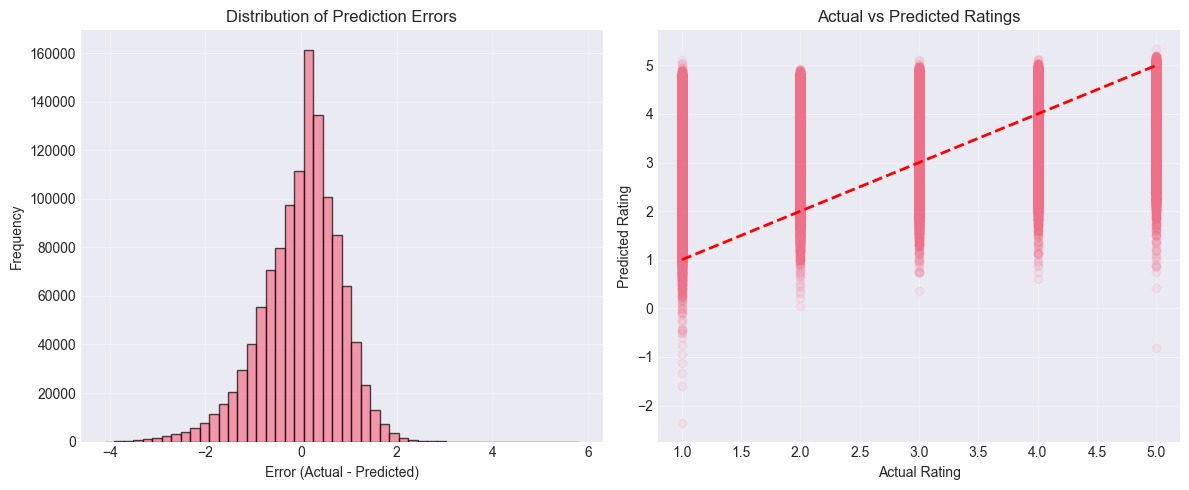

In [ ]:
# Evaluasi pada test set
test_predictions = ncf_model.predict(val_dataset, verbose=0)
test_actual = np.concatenate([y for x, y in val_dataset], axis=0)

# Hitung metrik
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test_actual, test_predictions))
mae = mean_absolute_error(test_actual, test_predictions)

print("\nCollaborative Filtering Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Analisis distribusi error
errors = test_actual - test_predictions.flatten()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(test_actual, test_predictions.flatten(), alpha=0.1)
plt.plot([1, 5], [1, 5], 'r--', linewidth=2)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('collaborative_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

Mengukur akurasi prediksi rating model NCF:

- **RMSE**: Root Mean Square Error untuk prediksi rating
- **MAE**: Mean Absolute Error yang lebih interpretable
- **Error analysis**: Distribusi error dan bias
- **Scatter plot**: Actual vs predicted ratings

Metrik ini mengukur seberapa akurat model memprediksi preferensi user.

### 7.3 Perbandingan dan Visualisasi Hasil Evaluasi

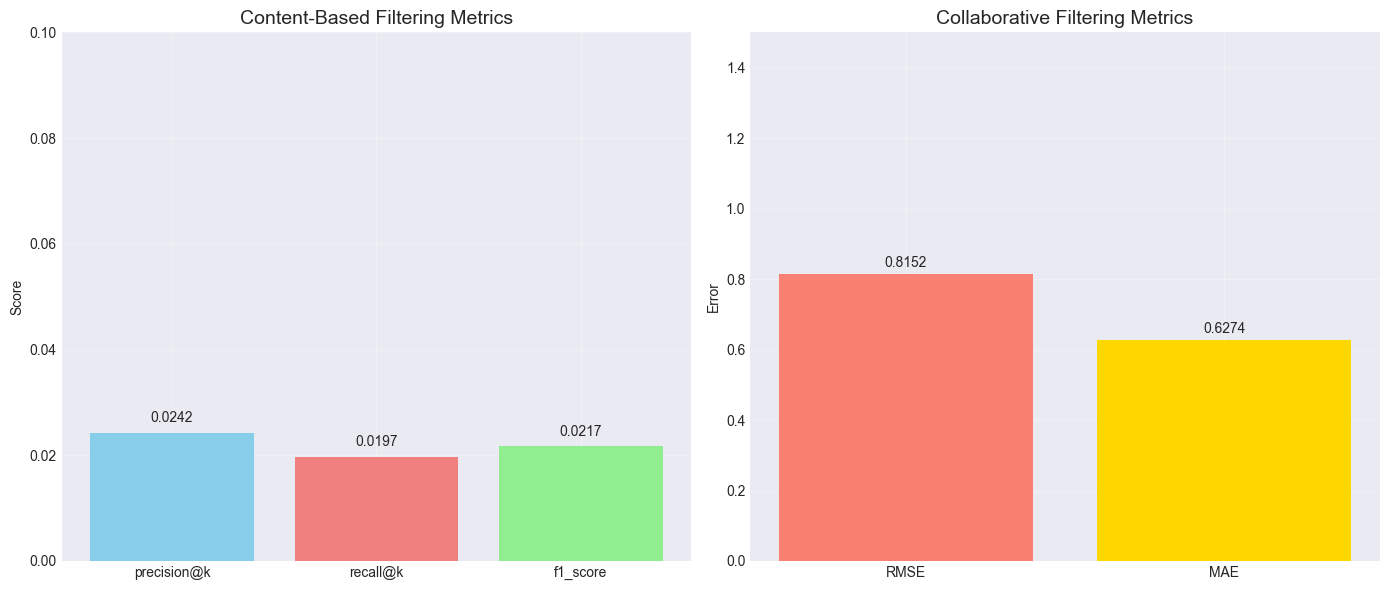

In [ ]:
# Visualisasi perbandingan metrik
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Content-Based Metrics
cb_metrics_plot = {k: v for k, v in cb_metrics.items() if k != 'n_evaluated_users'}
ax1.bar(cb_metrics_plot.keys(), cb_metrics_plot.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
ax1.set_title('Content-Based Filtering Metrics', fontsize=14)
ax1.set_ylabel('Score')
ax1.set_ylim(0, 0.1)
for i, (k, v) in enumerate(cb_metrics_plot.items()):
    ax1.text(i, v + 0.002, f'{v:.4f}', ha='center')
ax1.grid(True, alpha=0.3)

# Collaborative Filtering Metrics
cf_metrics = {'RMSE': rmse, 'MAE': mae}
ax2.bar(cf_metrics.keys(), cf_metrics.values(), color=['salmon', 'gold'])
ax2.set_title('Collaborative Filtering Metrics', fontsize=14)
ax2.set_ylabel('Error')
ax2.set_ylim(0, 1.5)
for i, (k, v) in enumerate(cf_metrics.items()):
    ax2.text(i, v + 0.02, f'{v:.4f}', ha='center')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('evaluation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

Membandingkan performa kedua pendekatan:

- **Content-based metrics**: Precision, Recall, F1-score
- **Collaborative metrics**: RMSE, MAE
- **Visualization**: Bar charts untuk easy comparison
- **Trade-offs**: Accuracy vs diversity, personalization vs coverage

Perbandingan ini membantu memahami kelebihan dan kekurangan masing-masing pendekatan.

## 8. Kesimpulan dan Rekomendasi

In [ ]:
print("\n" + "="*60)
print("KESIMPULAN PROYEK SISTEM REKOMENDASI BUKU")
print("="*60)

print("""
Dalam proyek ini, telah berhasil diimplementasikan dua pendekatan sistem rekomendasi:

1. CONTENT-BASED FILTERING:
   - Menggunakan TF-IDF untuk ekstraksi fitur dari penulis dan tag buku
   - Precision@10: {:.4f}
   - Cocok untuk merekomendasikan buku dengan karakteristik serupa
   - Kelebihan: Tidak memerlukan data pengguna lain, transparan
   - Kekurangan: Terbatas pada fitur yang tersedia, kurang personal

2. COLLABORATIVE FILTERING:
   - Menggunakan Neural Collaborative Filtering dengan embedding
   - RMSE: {:.4f}, MAE: {:.4f}
   - Mampu menangkap preferensi pengguna yang kompleks
   - Kelebihan: Rekomendasi lebih personal dan beragam
   - Kekurangan: Cold start problem, memerlukan data historis

REKOMENDASI PENGEMBANGAN:
1. Implementasi sistem hybrid yang menggabungkan kedua pendekatan
2. Menambahkan fitur tambahan seperti deskripsi buku menggunakan NLP
3. Implementasi online learning untuk update model secara real-time
4. Menambahkan faktor kontekstual (waktu, lokasi, device)
5. A/B testing untuk optimasi hyperparameter
""".format(cb_metrics['precision@k'], rmse, mae))

# Simpan model
print("\nMenyimpan model...")
ncf_model.save('book_recommendation_ncf_model.keras')
print("Model berhasil disimpan!")

print("\n✅ Proyek Sistem Rekomendasi Buku Selesai!")


KESIMPULAN PROYEK SISTEM REKOMENDASI BUKU

Dalam proyek ini, telah berhasil diimplementasikan dua pendekatan sistem rekomendasi:

1. CONTENT-BASED FILTERING:
   - Menggunakan TF-IDF untuk ekstraksi fitur dari penulis dan tag buku
   - Precision@10: 0.0242
   - Cocok untuk merekomendasikan buku dengan karakteristik serupa
   - Kelebihan: Tidak memerlukan data pengguna lain, transparan
   - Kekurangan: Terbatas pada fitur yang tersedia, kurang personal

2. COLLABORATIVE FILTERING:
   - Menggunakan Neural Collaborative Filtering dengan embedding
   - RMSE: 0.8152, MAE: 0.6274
   - Mampu menangkap preferensi pengguna yang kompleks
   - Kelebihan: Rekomendasi lebih personal dan beragam
   - Kekurangan: Cold start problem, memerlukan data historis

REKOMENDASI PENGEMBANGAN:
1. Implementasi sistem hybrid yang menggabungkan kedua pendekatan
2. Menambahkan fitur tambahan seperti deskripsi buku menggunakan NLP
3. Implementasi online learning untuk update model secara real-time
4. Menambahkan fa